___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [25]:
!pip install pandas-datareader --upgrade
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 3, 1)

In [4]:
# Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [5]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                        C                 \
              Open    High     Low   Close    Volume   Open    High    Low   
Date                                                                         
2021-03-01  35.344  35.872  35.066  35.613  46129647  68.49  69.985  67.98   
2021-02-26  35.553  35.857  34.509  34.538  71285631  66.78  67.595  65.54   
2021-02-25  36.777  36.847  35.583  35.752  75133363  69.04  69.380  66.89   
2021-02-24  35.563  36.340  35.424  36.200  58428240  67.17  68.680  67.00   
2021-02-23  35.245  35.713  34.966  35.344  67775666  65.59  66.915  64.86   

                             ...     MS                                  \
            Close    Volume  ...   Open    High    Low  Close    Volume   
Date                         ...                                          
2021-03-01  69.54  28054645  ...  78.05  79.540  78.04  79.16  11453114   
2021-02-26  65.88  24182191  ...  78.04  78.850  76.33  76.87  30392199   
2021-02-25  67.41  25206087  ...  80.50  81.395  78.11  78.43  11674604   
2021-02-24  68.60  20752879  ...  77.68  80.100  77.65  79.88  12681538   
2021-02-23  66.74  26712054  ...  77.26  77.860  76.26  77.50  12174910   

              WFC                                  
             Open   High     Low  Close    Volume  
Date                                               
2021-03-01  37.11  37.42  36.740  37.09  28066087  
2021-02-26  37.10  37.41  35.930  36.17  39467955  
2021-02-25  38.68  38.68  37.300  37.56  37233059  
2021-02-24  37.24  38.34  37.140  38.29  42764312  
2021-02-23  37.59  37.77  36.605  37.14  36792508  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [26]:
bank_stocks.head()

Bank Ticker     BAC                                        C                 \
Stock Info     Open    High     Low   Close    Volume   Open    High    Low   
Date                                                                          
2021-03-01   35.344  35.872  35.066  35.613  46129647  68.49  69.985  67.98   
2021-02-26   35.553  35.857  34.509  34.538  71285631  66.78  67.595  65.54   
2021-02-25   36.777  36.847  35.583  35.752  75133363  69.04  69.380  66.89   
2021-02-24   35.563  36.340  35.424  36.200  58428240  67.17  68.680  67.00   
2021-02-23   35.245  35.713  34.966  35.344  67775666  65.59  66.915  64.86   

Bank Ticker                   ...     MS                                  \
Stock Info   Close    Volume  ...   Open    High    Low  Close    Volume   
Date                          ...                                          
2021-03-01   69.54  28054645  ...  78.05  79.540  78.04  79.16  11453114   
2021-02-26   65.88  24182191  ...  78.04  78.850  76.33  76.87  30392199   
2021-02-25   67.41  25206087  ...  80.50  81.395  78.11  78.43  11674604   
2021-02-24   68.60  20752879  ...  77.68  80.100  77.65  79.88  12681538   
2021-02-23   66.74  26712054  ...  77.26  77.860  76.26  77.50  12174910   

Bank Ticker    WFC                                  
Stock Info    Open   High     Low  Close    Volume  
Date                                                
2021-03-01   37.11  37.42  36.740  37.09  28066087  
2021-02-26   37.10  37.41  35.930  36.17  39467955  
2021-02-25   38.68  38.68  37.300  37.56  37233059  
2021-02-24   37.24  38.34  37.140  38.29  42764312  
2021-02-23   37.59  37.77  36.605  37.14  36792508  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [19]:
df['Close'].max()

Symbols
BAC     36.200
C       78.067
GS     329.920
JPM    153.260
MS      79.880
WFC     51.510
dtype: float64

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     36.200
C       78.067
GS     329.920
JPM    153.260
MS      79.880
WFC     51.510
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [20]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [23]:
for ticker in tickers:
    returns[f"{ticker} Return"] = bank_stocks[ticker]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-26,-0.030186,-0.052632,-0.035433,-0.022126,-0.028929,-0.024805
2021-02-25,0.035150,0.023224,0.025925,0.027247,0.020294,0.038430
2021-02-24,0.012531,0.017653,0.008791,0.013758,0.018488,0.019436
2021-02-23,-0.023646,-0.027114,-0.034583,-0.017291,-0.029795,-0.030034


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

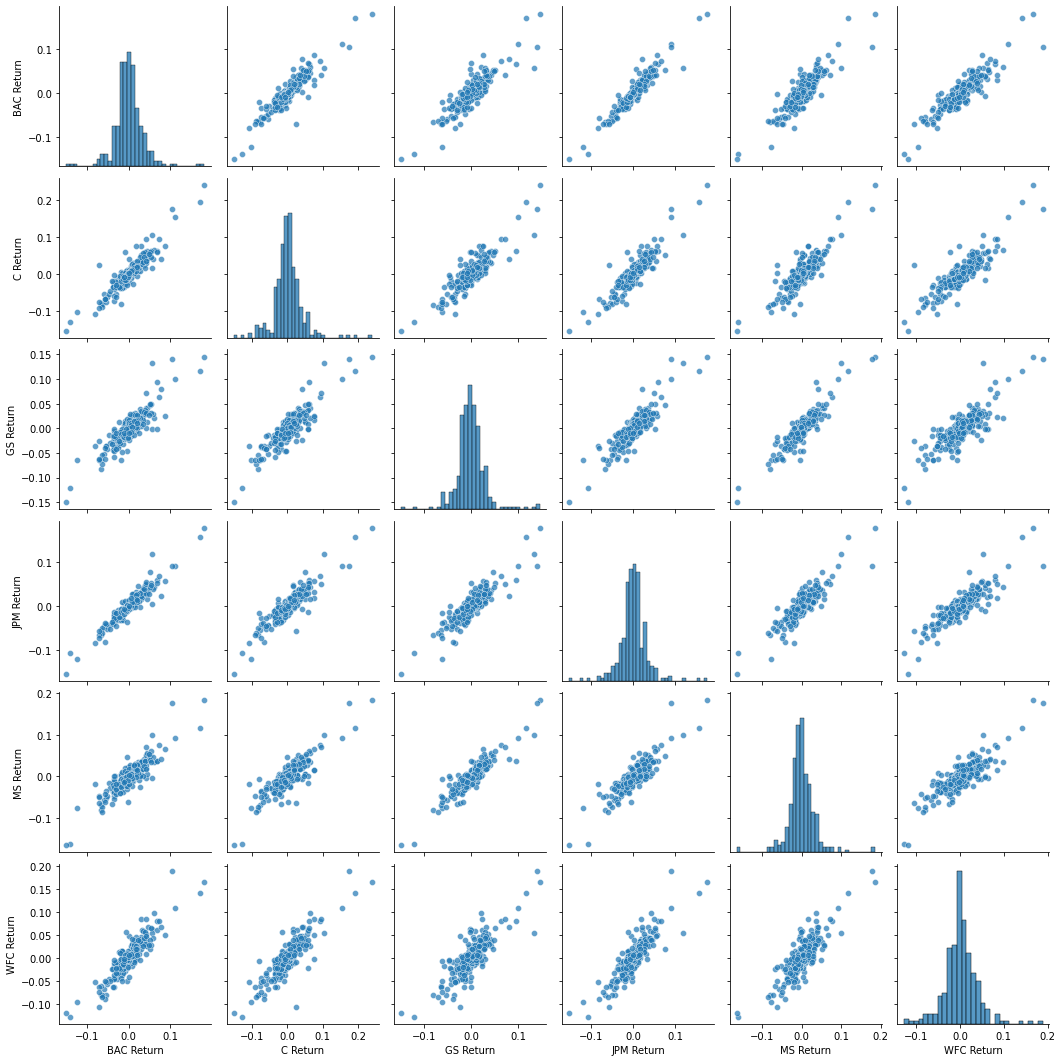

In [32]:
sns.pairplot(data = returns, plot_kws={'ec': 'white', 'alpha': .7})

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [39]:
# Note the correlation with the COVID-19 pandemic
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [41]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

In [61]:
start = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 3, 31)
returns.loc[(returns.index > start) & (returns.index < end)]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-03-30,0.038157,0.046522,0.032586,0.038533,0.024717,0.042523
2020-03-27,-0.019959,-0.006361,-0.008130,-0.025335,-0.023826,0.012009
2020-03-26,0.051887,0.050688,0.047047,0.076705,0.049964,0.020493
2020-03-25,-0.071306,-0.090392,-0.064287,-0.065131,-0.048133,-0.062450
2020-03-24,-0.003304,-0.028685,-0.009815,-0.035976,-0.022696,-0.001746
2020-03-23,-0.140273,-0.129585,-0.121341,-0.106304,-0.162843,-0.126883
2020-03-20,0.087960,0.075426,0.025515,0.056561,0.066911,0.049518
2020-03-19,0.077721,0.041545,0.080103,0.021562,0.042087,0.067519
2020-03-18,-0.019347,-0.081011,-0.063431,-0.016536,-0.005489,-0.005985


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [63]:
# Most risky = Citi Group
returns.std()

BAC Return    0.035252
C Return      0.041412
GS Return     0.031601
JPM Return    0.032507
MS Return     0.034308
WFC Return    0.037824
dtype: float64

In [69]:
COVID = returns.loc[(returns.index > start) & (returns.index < end)]
COVID.std()

BAC Return    0.088354
C Return      0.102575
GS Return     0.082473
JPM Return    0.084146
MS Return     0.091174
WFC Return    0.087190
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

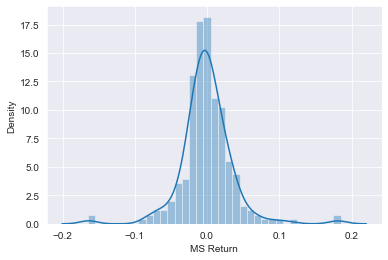

In [83]:
sns.set_style('darkgrid')
returns_2020 = returns.loc['2020']
sns.distplot(returns_2020['MS Return'])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

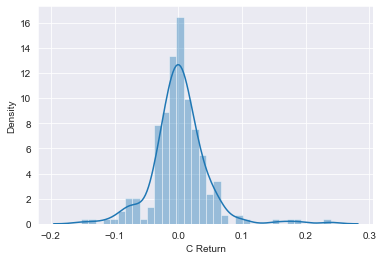

In [86]:
sns.set_style('darkgrid')
sns.distplot(returns_2020['C Return'])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf

import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [88]:
bank_stocks.head()

Bank Ticker     BAC                                        C                 \
Stock Info     Open    High     Low   Close    Volume   Open    High    Low   
Date                                                                          
2021-03-01   35.344  35.872  35.066  35.613  46129647  68.49  69.985  67.98   
2021-02-26   35.553  35.857  34.509  34.538  71285631  66.78  67.595  65.54   
2021-02-25   36.777  36.847  35.583  35.752  75133363  69.04  69.380  66.89   
2021-02-24   35.563  36.340  35.424  36.200  58428240  67.17  68.680  67.00   
2021-02-23   35.245  35.713  34.966  35.344  67775666  65.59  66.915  64.86   

Bank Ticker                   ...     MS                                  \
Stock Info   Close    Volume  ...   Open    High    Low  Close    Volume   
Date                          ...                                          
2021-03-01   69.54  28054645  ...  78.05  79.540  78.04  79.16  11453114   
2021-02-26   65.88  24182191  ...  78.04  78.850  76.33  76.87  30392199   
2021-02-25   67.41  25206087  ...  80.50  81.395  78.11  78.43  11674604   
2021-02-24   68.60  20752879  ...  77.68  80.100  77.65  79.88  12681538   
2021-02-23   66.74  26712054  ...  77.26  77.860  76.26  77.50  12174910   

Bank Ticker    WFC                                  
Stock Info    Open   High     Low  Close    Volume  
Date                                                
2021-03-01   37.11  37.42  36.740  37.09  28066087  
2021-02-26   37.10  37.41  35.930  36.17  39467955  
2021-02-25   38.68  38.68  37.300  37.56  37233059  
2021-02-24   37.24  38.34  37.140  38.29  42764312  
2021-02-23   37.59  37.77  36.605  37.14  36792508  

[5 rows x 30 columns]

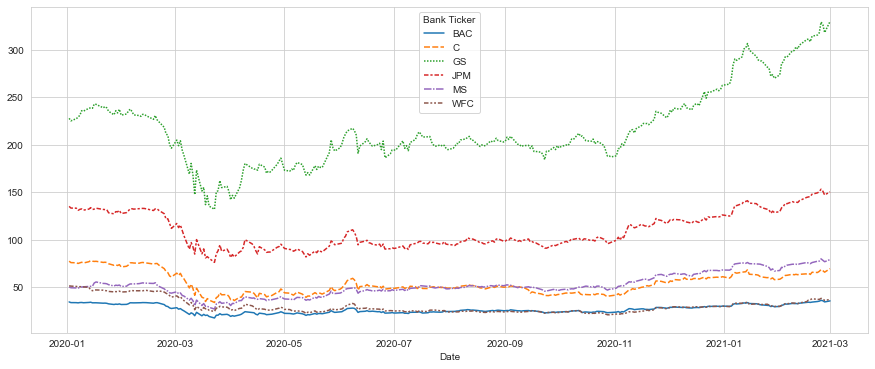

In [101]:
closes = bank_stocks.xs(key='Close', axis=1, level='Stock Info')

plt.figure(figsize=(15, 6))
sns.lineplot(data=closes)
plt.show()

In [110]:
closes.iplot(mode='lines+markers', symbol='circle', size=3)

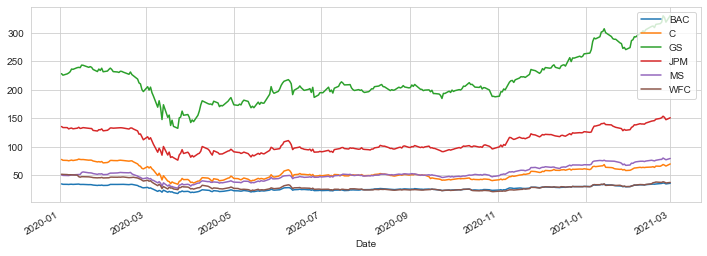

In [111]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

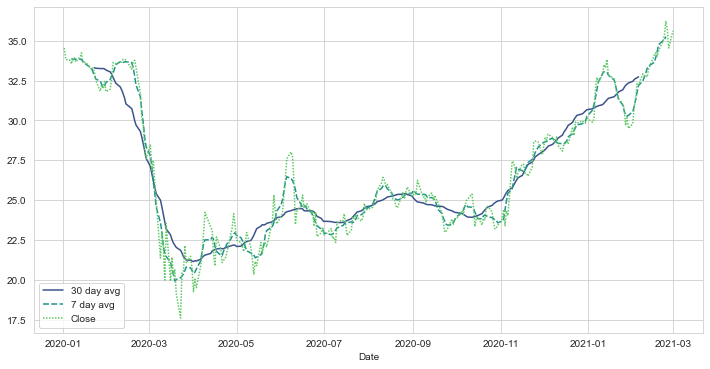

In [123]:
plt.figure(figsize=(12,6))
BAC['30 day avg'] = BAC['Close'].rolling(window=30, center=True).mean()
BAC['7 day avg'] = BAC['Close'].rolling(window=7, center=True).mean()

sns.lineplot(data=BAC[['30 day avg', '7 day avg', 'Close']], palette='viridis')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

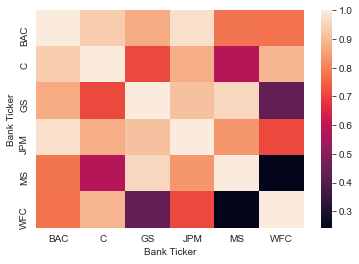

In [129]:
corr = closes.corr()
sns.heatmap(corr)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

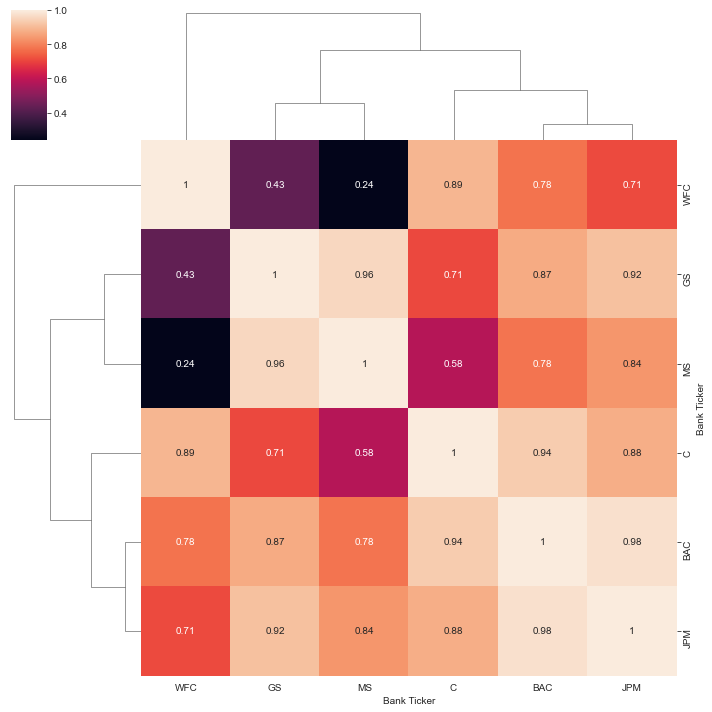

In [131]:
sns.clustermap(corr, annot=True)

In [138]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.strip()
        tickers.append(ticker)
        
    return tickers

ticks = save_sp500_tickers()
ticks

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED'

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [146]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2020'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [147]:
MS['Close'].loc['2020'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [148]:
BAC['Close'].loc['2020'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.